# Assignment 3

In this assignment, you will simulate Random Sampling, Uncertainty Sampling, and Query by Bagging on a dataset of your choice. Follow the instructions both in this notebook and in the class lectures. Feel free to reuse as much code as you like from the other notebooks provided in the class.

1. Pick a **binary** classification dataset. You can pick any classification dataset that you like, except the Toy Datasets from sklearn.
1. Split the data into train and test; 2/3 train, 1/3 test. Train split will be called the pool.
1. Pick one of the following classifiers: decision trees, naive Bayes, or logistic regression.
1. Repeat 10 times:
    1. Create a numpy RandomState object with a different seed
    1. Get a random permutation of the pool objects.
    1. Create an initial training data, L, where you go through the permutation of the pool and continue adding into L until you have at least one object of each class.
    1. For a budget of 200:
        1. Simulate random sampling (starting from the initial L) and record accuracy, precision, recall, and F1.
        1. Simulate uncertainty sampling (starting from the initial L) and record accuracy, precision, recall, and F1.
        1. Simulate query-by-bagging (starting from initial L) and record accuracy, precision, recall, and F1. For bagging, use max_samples=1.0, max_features=0.50, bootstrap=False, bootstrap_features=False.
1. Report average accuracy, precision, recall, and F1 results as figures (i.e., 4 figures). x-axis should be the number of labeled objects. Pay special attention to the correct alignment of different trials, where the size of initial L (and the size of the final training set) can vary from trial to trial.
1. Discuss your findings in detail.

#### 1. Pick a **binary** classification dataset. You can pick any classification dataset that you like, except the Toy Datasets from sklearn.

In [1]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

#### 2. Split the data into train and test; 2/3 train, 1/3 test. Train split will be called the pool.

In [2]:
from sklearn.model_selection import train_test_split
X_pool, X_test, y_pool, y_test = train_test_split(X, y, random_state=42, test_size=1/3)

In [7]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

#### 3. Pick one of the following classifiers: decision trees, naive Bayes, or logistic regression.

Picking logistic regression

#### 4. Repeat 10 times:
    A. Create a numpy RandomState object with a different seed
    B. Get a random permutation of the pool objects.
    C. Create an initial training data, L, where you go through the permutation of the pool and continue adding into L until you have at least one object of each class.
    D. For a budget of 200:
        a. Simulate random sampling (starting from the initial L) and record accuracy, precision, recall, and F1.
        b. Simulate uncertainty sampling (starting from the initial L) and record accuracy, precision, recall, and F1.
        c. Simulate query-by-bagging (starting from initial L) and record accuracy, precision, recall, and F1. For bagging, 
           use max_samples=1.0, max_features=0.50, bootstrap=False, bootstrap_features=False.

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier

def random_sampling(d, accuracy, precision, recall, f1):
    rs_cands = candidates.copy()
    rs_tis = train_indices.copy()
    for i in range(budget):
        c = rand.randint(len(rs_cands))
        rs_tis.append(rs_cands[c])
        rs_cands = rs_cands[:c] + rs_cands[c+1:]
        clf = LogisticRegression(solver='liblinear')
        clf.fit(X_pool[rs_tis], y_pool[rs_tis])
        y_test_predict = clf.predict(X_test)
        accuracy += [accuracy_score(y_test, y_test_predict)]
        precision += [precision_score(y_test, y_test_predict)]
        recall += [recall_score(y_test, y_test_predict)]
        f1 += [f1_score(y_test, y_test_predict)]
    d['random_sampling'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
    return d
    
def uncertainty_sampling(d, accuracy, precision, recall, f1):
    unc_cands = candidates.copy()
    unc_tis = train_indices.copy()
    clf = LogisticRegression(solver='liblinear')
    clf.fit(X_pool[unc_tis], y_pool[unc_tis])
    for i in range(budget):
        probs = clf.predict_proba(X_pool[unc_cands])
        c = np.argmin(np.max(probs, axis=1))
        unc_tis.append(unc_cands[c])
        unc_cands = unc_cands[:c] + unc_cands[c+1:]
        clf = LogisticRegression(solver='liblinear')
        clf.fit(X_pool[unc_tis], y_pool[unc_tis])
        y_test_predict = clf.predict(X_test)
        accuracy += [accuracy_score(y_test, y_test_predict)]
        precision += [precision_score(y_test, y_test_predict)]
        recall += [recall_score(y_test, y_test_predict)]
        f1 += [f1_score(y_test, y_test_predict)]
    d['uncertainty_sampling'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
    return d
    
def query_by_bagging(d, accuracy, precision, recall, f1):
    bag_cands = candidates.copy()
    bag_tis = train_indices.copy()
    for i in range(budget):
        base_clf = LogisticRegression(solver='liblinear')
        bag_clf = BaggingClassifier(base_estimator=base_clf, max_samples=1.0, max_features=0.50, bootstrap=False, bootstrap_features=False)
        bag_clf.fit(X_pool[bag_tis], y_pool[bag_tis])
        probs = bag_clf.predict_proba(X_pool[bag_cands])
        c = np.argmin(np.max(probs, axis=1))
        bag_tis.append(bag_cands[c])
        bag_cands = bag_cands[:c] + bag_cands[c+1:]
        clf = LogisticRegression(solver='liblinear')
        clf.fit(X_pool[bag_tis], y_pool[bag_tis])
        y_test_predict = clf.predict(X_test)
        accuracy += [accuracy_score(y_test, y_test_predict)]
        precision += [precision_score(y_test, y_test_predict)]
        recall += [recall_score(y_test, y_test_predict)]
        f1 += [f1_score(y_test, y_test_predict)]
    d['query_by_bagging'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
    return d

results = []
import random
seeds = random.sample(range(1, 100), 10)

for i in seeds:
    d = {}
    d['seed'] = i
    rand = np.random.RandomState(d['seed'])
    candidates = list(rand.permutation(X_pool.shape[0]))
    train_indices = []
    for j in range(len(candidates)):
        train_indices.append(candidates[j])
        if len(np.unique(y_pool[train_indices])) == 2:
            candidates = candidates[j+1:]
            break
    d['L'] = len(train_indices)
    budget = 200
    clf = LogisticRegression(solver='liblinear')
    clf.fit(X_pool[train_indices], y_pool[train_indices])
    y_test_predict = clf.predict(X_test)
    print(y_test)
    print(y_test_predict)
    initial_accuracy = accuracy_score(y_test, y_test_predict)
    initial_precision = precision_score(y_test, y_test_predict)
    initial_recall = recall_score(y_test, y_test_predict)
    initial_f1 = f1_score(y_test, y_test_predict)
    simulations = [random_sampling, uncertainty_sampling, query_by_bagging]
    for s in simulations:
        d = s(d,[initial_accuracy],[initial_precision],[initial_recall],[initial_f1])
    results += [d]

metrics = {'random_sampling':{},'uncertainty_sampling':{},'query_by_bagging':{}}

for r in results:
    for i in ['random_sampling','uncertainty_sampling','query_by_bagging']:
        for j in range(r['L'],r['L']+len(r[i]['accuracy'])):
            if str(j) in metrics[i]:
                metrics[i][str(j)]['accuracy'] += [r[i]['accuracy'][j-r['L']]]
                metrics[i][str(j)]['precision'] += [r[i]['precision'][j-r['L']]]
                metrics[i][str(j)]['recall'] += [r[i]['recall'][j-r['L']]]
                metrics[i][str(j)]['f1'] += [r[i]['f1'][j-r['L']]]
            else:
                metrics[i][str(j)] = {'accuracy': [r[i]['accuracy'][j-r['L']]],
                                      'precision': [r[i]['precision'][j-r['L']]],
                                      'recall': [r[i]['recall'][j-r['L']]],
                                      'f1': [r[i]['f1'][j-r['L']]]}

accuracy = [[],[],[]]
precision = [[],[],[]]
recall = [[],[],[]]
f1 = [[],[],[]]
L = []
counter = 0

for key, val in metrics.items():
    for key1, val1 in sorted(metrics[key].items(), key = lambda x: int(x[0])):
        if(counter == 0):
            L += [int(key1)]
        accuracy[counter] += [sum(metrics[key][key1]['accuracy'])/len(metrics[key][key1]['accuracy'])]
        precision[counter] += [sum(metrics[key][key1]['precision'])/len(metrics[key][key1]['precision'])]
        recall[counter] += [sum(metrics[key][key1]['recall'])/len(metrics[key][key1]['recall'])]
        f1[counter] += [sum(metrics[key][key1]['f1'])/len(metrics[key][key1]['f1'])]
    counter += 1

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1]
[1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 0 1]
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 

#### 5. Report average accuracy, precision, recall, and F1 results as figures (i.e., 4 figures). x-axis should be the number of labeled objects. Pay special attention to the correct alignment of different trials, where the size of initial L (and the size of the final training set) can vary from trial to trial.

In [11]:
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [24]:
l = []
l += [(3,"s")]
l += [(4,"f")]
l += [(0,"d")]
print(sorted(l, reverse = True))

[(4, 'f'), (3, 's'), (0, 'd')]


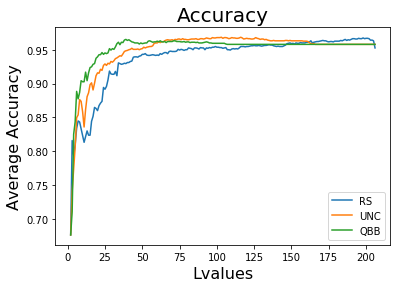

In [13]:
plt.plot(L, accuracy[0], label="RS")
plt.plot(L, accuracy[1], label="UNC")
plt.plot(L, accuracy[2], label="QBB")
plt.title('Accuracy', fontsize=20)
plt.xlabel('Lvalues', fontsize=16)
plt.ylabel('Average Accuracy', fontsize=16)
plt.legend()

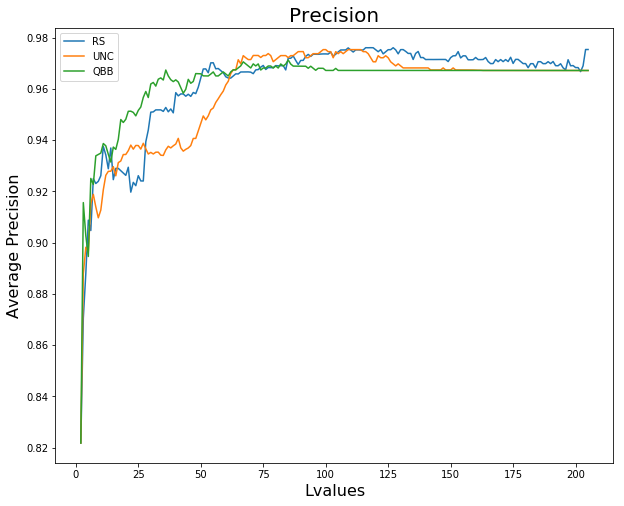

In [11]:
plt.plot(L, precision[0], label="RS")
plt.plot(L, precision[1], label="UNC")
plt.plot(L, precision[2], label="QBB")
plt.title('Precision', fontsize=20)
plt.xlabel('Lvalues', fontsize=16)
plt.ylabel('Average Precision', fontsize=16)
plt.legend()

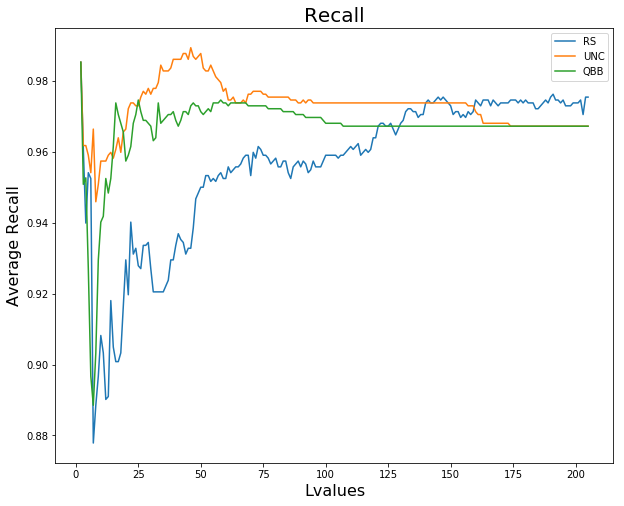

In [12]:
plt.plot(L, recall[0], label="RS")
plt.plot(L, recall[1], label="UNC")
plt.plot(L, recall[2], label="QBB")
plt.title('Recall', fontsize=20)
plt.xlabel('Lvalues', fontsize=16)
plt.ylabel('Average Recall', fontsize=16)
plt.legend()

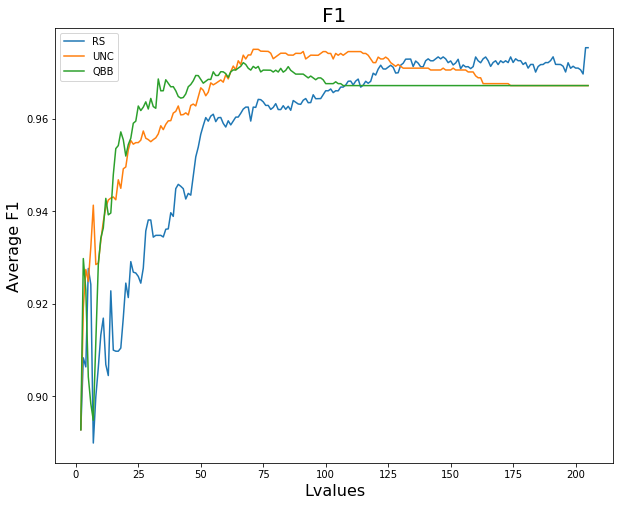

In [13]:
plt.plot(L, f1[0], label="RS")
plt.plot(L, f1[1], label="UNC")
plt.plot(L, f1[2], label="QBB")
plt.title('F1', fontsize=20)
plt.xlabel('Lvalues', fontsize=16)
plt.ylabel('Average F1', fontsize=16)
plt.legend()

#### 6. Discuss your findings in detail.

1. With respect to the accuracy plot, the accuracy of random sample increases logrithimacally and continues to increase as the number of object increase. Both Uncertainty sampling and query-by-bagging does logrithimacally increase but converges (ave accuracy between seeds) at about .9575 at around 170 objects. Query-by bagging plateau at around 100 objects at .9575 and then uncertainity sampling. As these sampling methods plateaus, it is interesting to see the there is a drop (smaller # of objects yields higher accuracy). Random sampling seems to be not impacted by this effect.

2. Precision also follows the same property as the accuracy graph where uncertainty and query-by bagging converges a a smaler precision value and plateaus at the converged value. Once again, only random sampling's precision increases as the number of objects increase.

3. The recall metric is all over the place when the number of objects are small but stablizes as it increases. Once again, both query-by bagging and uncertainty sampling have higher scores when the number of objects are small while random sampling improves as the model gets more complex. This is the first time some other sampling method (uncertainty sampling) have the higher overall metric value even though it was when the model is simple (n ~= 50)

4. F1 score graph is a mix of the recall and precision graph in the sense that query-by-bagging and uncertainty samples does decrease and plateau while random samplinging increases as the number of objects increase, but a lower sample size yields the highest f1 score for uncertainty sampling at (n ~= 70).

Overall, random sampling yields better metrics as the model becomes more complex (higher budget) while both query-by bagging and uncertainty sampling have better etrics when the model is simple. Uncertainty sampling gives the better overall metric results (for recall and f1) at a lower sample size.